# Data Cleaning

In this notebook I take a look at the data and confirm it contains what is expected. Furthermore I will clean the data to make sure it is suitable for analysis. This includes checking for innapropriate and missing values, ensuring the data is in the correct format, and checking the distributions of the variables. At the end of this process I will split the data into training and testing sets for the machine learning process.

## Road Map
1) Initial inspection <br>
2) Checking for appropriate values <br>
3) Ensure proper formating <br>
4) Analyze distributions <br>
5) Train/test split <br>

First I will import all the libraries I need along with the data. The dataset can be found on <a href=https://www.kaggle.com/jessemostipak/hotel-booking-demand>Kaggle</a>.

In [1]:
# import libraries
import numpy as np # mathmatical operations
import pandas as pd # dataframes
import matplotlib.pyplot as plt # illustrations
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit # both for train/test split

In [2]:
# import data

# variable "df" contains data as pandas dataframe
df = pd.read_csv("hotel_bookings.csv")

# preview dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 1 Initial Inspection

Now I will explore the data a little further by displaying all the column names along with the format each column is currently in, and whether there is missing data in each column.

In [3]:
# display information on dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

So far the data is as expected.

# 2 Checking For Appropriate Values

In this section I will check to make sure there are no missing or inappropriate values. I will start by displaying the number of missing values. If there are missing values I will also show what percent of the column is missing. As a rule, if over %40 of the column is missing, it will be dropped.

In [4]:
# display count of missing values in the dataframe
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
# display percentage missing for country, agent, and company

# loop through column names
for col_name in ["country", "agent", "company"]:
    
    # find percentage missing and store it to a variable called "percent_missing"
    # sum of missing values / length of dataframe
    # round to 2 decimal places
    percent_missing = round(df[col_name].isna().sum()/len(df), 2)
    
    # display column name along with percent_missing
    # add spacing using f-string formatting
    print(f"{col_name:{10}}{percent_missing}")

country   0.0
agent     0.14
company   0.94


Here we can see the "country" and "agent" columns are missing very few values, while the "company" column is missing almost all of its values. For the "country" column I will fill in the missing values with the most common value. For the "agent" column I will create an agent name called 'missing'. I will go ahead and drop the "company" column.

##### Country

In [6]:
# fill in missing values in "country" column

# print "country" column value counts in percent form
df.country.value_counts()[:3]

PRT    48590
GBR    12129
FRA    10415
Name: country, dtype: int64

In [7]:
# fill in missing "country" values with string 'PRT'

# map "country" column
# if the value is a string, if it isn't replace with string "PRT"
df.country = df.country.fillna("PRT")

# check to see if there are any null values left over
df.country.isna().sum()

0

##### Agent

In [8]:
# fill in missing values in "agent" column with the string 'missing'
df.agent = df.agent.fillna("missing")

# check to see if there are any missing values left over
df.agent.isna().sum()

0

##### Company

In [9]:
# drop company column
df.drop("company", axis=1, inplace=True)

Now I will check for innappropriate values. For the numerical values I will display there basic statistics including the maximum and minimum values. For the string variables I will display all of there unique values if the number of unique values is under 100.

In [10]:
# check numerical variables for inappropriate values
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


Everything looks good with the numerical columns. Now for the string columns.

In [11]:
# loop through all columns
for col_name in df.columns:
    
    # if the column is of the string datatype
    if df[col_name].dtype == "object":
        
        # store unique values in variable "unique_vals"
        unique_vals = df[col_name].unique()
        
        # if the length of "unique_vals" is over 50 only select the first 50 values
        if len(unique_vals) > 100:
            
            unique_vals = unique_vals[:50]
        
        # print the unique values for that column
        print(f"\n {col_name} \n {unique_vals} \n\n\n")


 hotel 
 ['Resort Hotel' 'City Hotel'] 




 arrival_date_month 
 ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] 




 meal 
 ['BB' 'FB' 'HB' 'SC' 'Undefined'] 




 country 
 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB'] 




 market_segment 
 ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation'] 




 distribution_channel 
 ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS'] 




 reserved_room_type 
 ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B'] 




 assigned_room_type 
 ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K'] 




 deposit_type 
 ['No Deposit' 'Refundable' 'Non Refund'] 




 agent 
 ['missing' 304.0 240.0 303.0 

It seems like the dataframe contains only appropriate values.

# 3 Ensure Proper Formatting

Now I will make sure all the data is in the proper format. The main issue I saw so far has to do with the dates. The columns dealing with the arrival date hold a month, day, etc. I will make sure they are formatted properly. The first step is to gather the names of the columns.

In [12]:
# print out names of columns starting with arrival date
print([col_name for col_name in df.columns if col_name.startswith("arrival_date")])

['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month']


I will go ahead and drop the "arrival_date_week_number" column.

In [13]:
# drop "arrival_date_week_number" column
df.drop("arrival_date_week_number", axis=1, inplace=True)

Now I will turn the other columns into one column containing date times. I will call the column "arrival_date".

In [14]:
# make "arrival_date" column

# save columns and make sure they are in string format
year = df["arrival_date_year"].astype(str)
month = df["arrival_date_month"]
day = df["arrival_date_day_of_month"].astype(str)

# create a function to combine strings into one
df["arrival_date"] =  year + "\\" + month + "\\" + day

# preview column
df["arrival_date"].head()

0    2015\July\1
1    2015\July\1
2    2015\July\1
3    2015\July\1
4    2015\July\1
Name: arrival_date, dtype: object

In [15]:
# save column in datetime format
df.arrival_date = pd.to_datetime(df.arrival_date, format="%Y\%B\%d")

# preview column
df.arrival_date.head()

0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

Now the arrival time is in the correct format. I will drop the unneccessary columns.

In [16]:
df.drop(["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"], axis=1, inplace=True)

# 4 Analyze Distributions

Now it is time for me to analyze the distributions of the data points. This will let me know if anything is in a logarithmic or distribution or if it is skewed. I will look at the distributions via histograms.

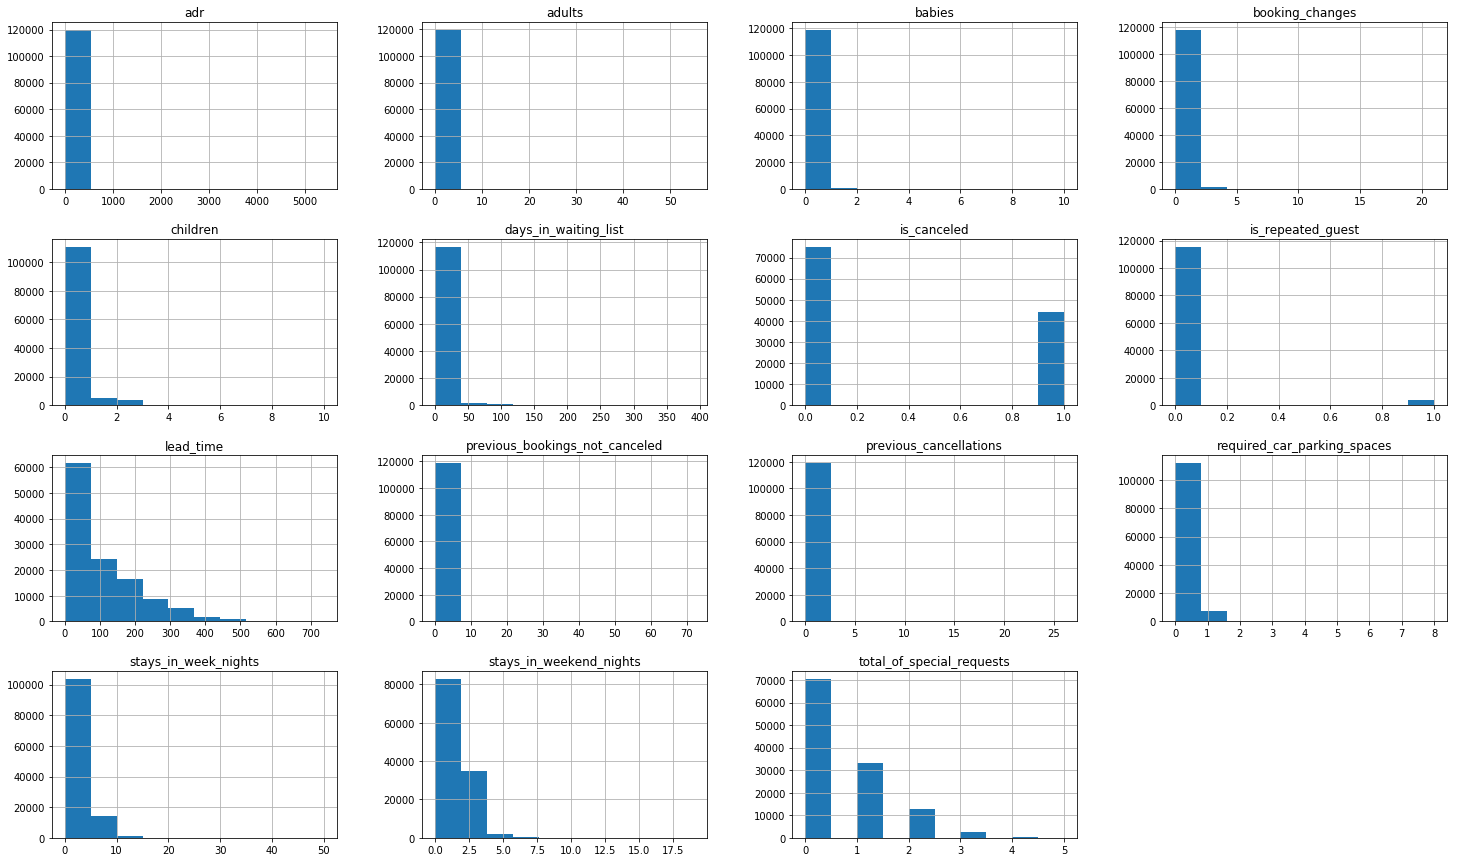

In [17]:
# draw histograms of columns
df.hist(figsize=(25, 15));

It looks like "stays_in_week_nights", "stays_in_weekend_nights", and "lead_time" might look better log-transformed. Let me experiment with that. Also, I see the classes of the dataframe are imbalanced so I will take note of that.

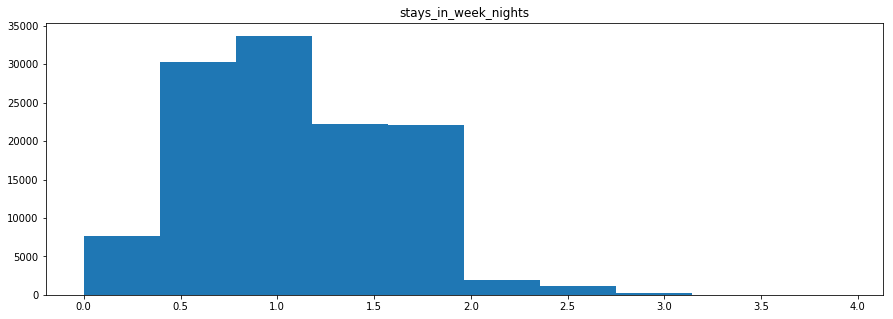

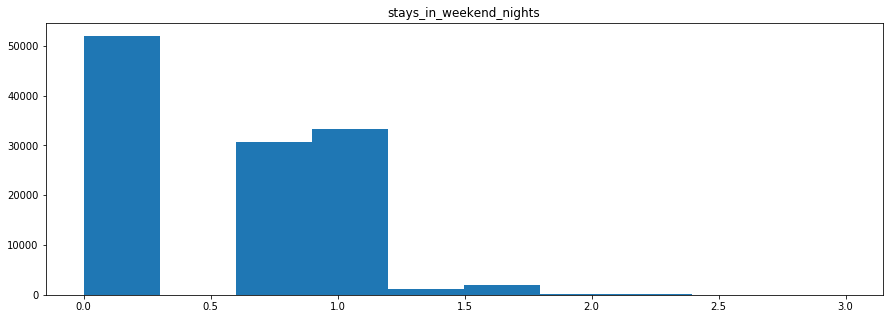

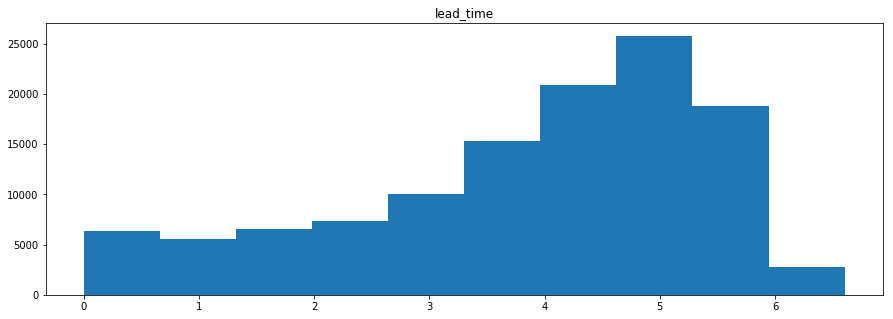

In [18]:
# plot mentioned columns after log-transformation

# iterate over column names
for col_name in ["stays_in_week_nights", "stays_in_weekend_nights", "lead_time"]:
    
    # ensure there are no zeros or negative values
    new_col = df[col_name] + df[col_name].min() + 1
    
    # log-transform column
    transformed_col = np.log(new_col)
    
    # plot log of column
    plt.figure(figsize=(15, 5))
    plt.hist(transformed_col)
    plt.title(col_name)
    plt.show()

It looks like a log-transformation would help with "stays_in_week_nights" and "lead_time", so I will transform them.

In [20]:
# log transform columns

# create a function for log transformation
def log_transform(series):
    
    # add series minimum and add 1
    series = series + series.min() + 1
    
    # return log transform
    return np.log(series)

# apply function to mentioned columns
df["stays_in_week_nights"] = log_transform(df["stays_in_week_nights"])
df["lead_time"] = log_transform(df["lead_time"])

# Train/Test Split

Since the classes of the data are imbalanced I will use a stratified split on the data instead of a normal train/test split.

In [22]:
# split the data
# stratify on the target variable

# instantiate splitter
sss = StratifiedShuffleSplit(test_size=0.2, random_state=42)

# get indices
train_index, test_index = next(sss.split(df.drop("is_canceled", axis=1), df.is_canceled))

# make sets using indices
train = df.iloc[train_index]
test = df.iloc[test_index]

# inspect shapes 
train.shape, test.shape

((95512, 28), (23878, 28))

Now I will save the data into .csv files

In [23]:
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)